# Выборка 

Общее по выборке целиком.

<table>
  <tr>
    <td>**Name, NGC**</td>
    <td>**Name, UGC**</td>
    <td>**Type**</td>
    <td>$i,^{\circ}$</td>
    <td>$\sigma$ source</td>
  </tr>
  <tr>
    <td>NGC 338</td>
    <td>UGC 624</td>
    <td>Sab</td>
    <td>64±4</td>
    <td>Z</td>
  </tr>
  <tr>
    <td>NGC 1167</td>
    <td>UGC 2487</td>
    <td>SA0</td>
    <td>38±2</td>
    <td>Z (CALIFA?)</td>
  </tr>
  <tr>
    <td>NGC 2985</td>
    <td>UGC 5253</td>
    <td>(R)SA(r)ab</td>
    <td>36±2</td>
    <td>N08</td>
  </tr>
  <tr>
    <td>NGC 3898</td>
    <td>UGC 6787</td>
    <td>SA(s)ab</td>
    <td>61±8</td>
    <td>N08 (ATLASS3D?)</td>
  </tr>
  <tr>
    <td>NGC 4258</td>
    <td>UGC 7353</td>
    <td>SABb</td>
    <td>65±5</td>
    <td>H98 (ATLASS3D?)</td>
  </tr>
  <tr>
    <td>NGC 4725</td>
    <td>UGC 7989</td>
    <td>SABa</td>
    <td>50±6</td>
    <td>H99 (ATLASS3D?)</td>
  </tr>
  <tr>
    <td>NGC 5533</td>
    <td>UGC 9133</td>
    <td>SA(rs)ab</td>
    <td>52±1</td>
    <td>N08 (CALIFA?)</td>
  </tr>
</table>


N08 - https://ui.adsabs.harvard.edu/#abs/2008MNRAS.388.1381N/abstract

Все картинки:

In [4]:
from IPython.display import Image, display
from prettypandas import PrettyPandas
import pandas as pd
import os
import sys
from PIL import Image as Im
%pylab
%matplotlib inline

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [5]:
summary_imgs_path = '..\\pics\\notebook_summary\\'

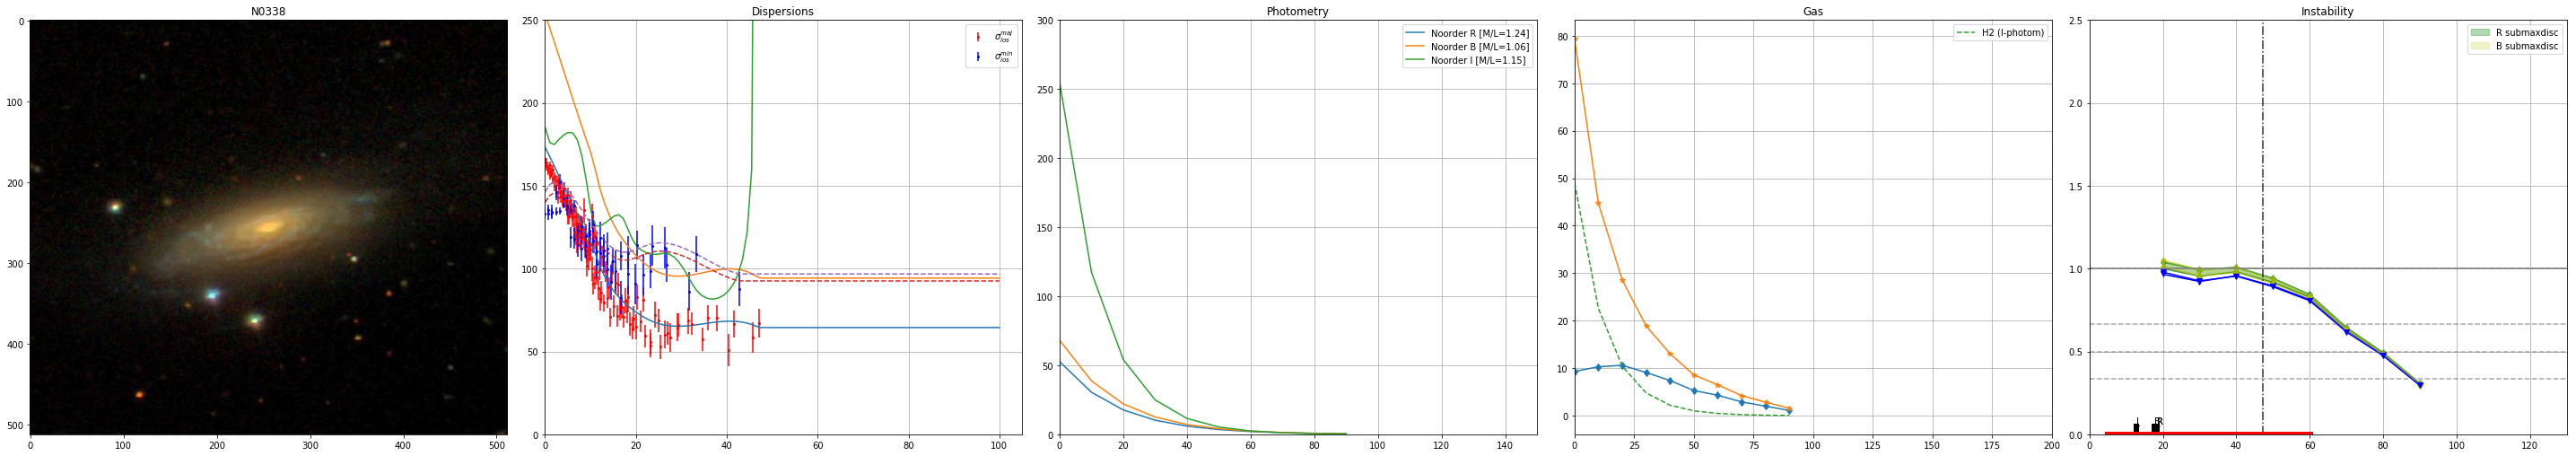

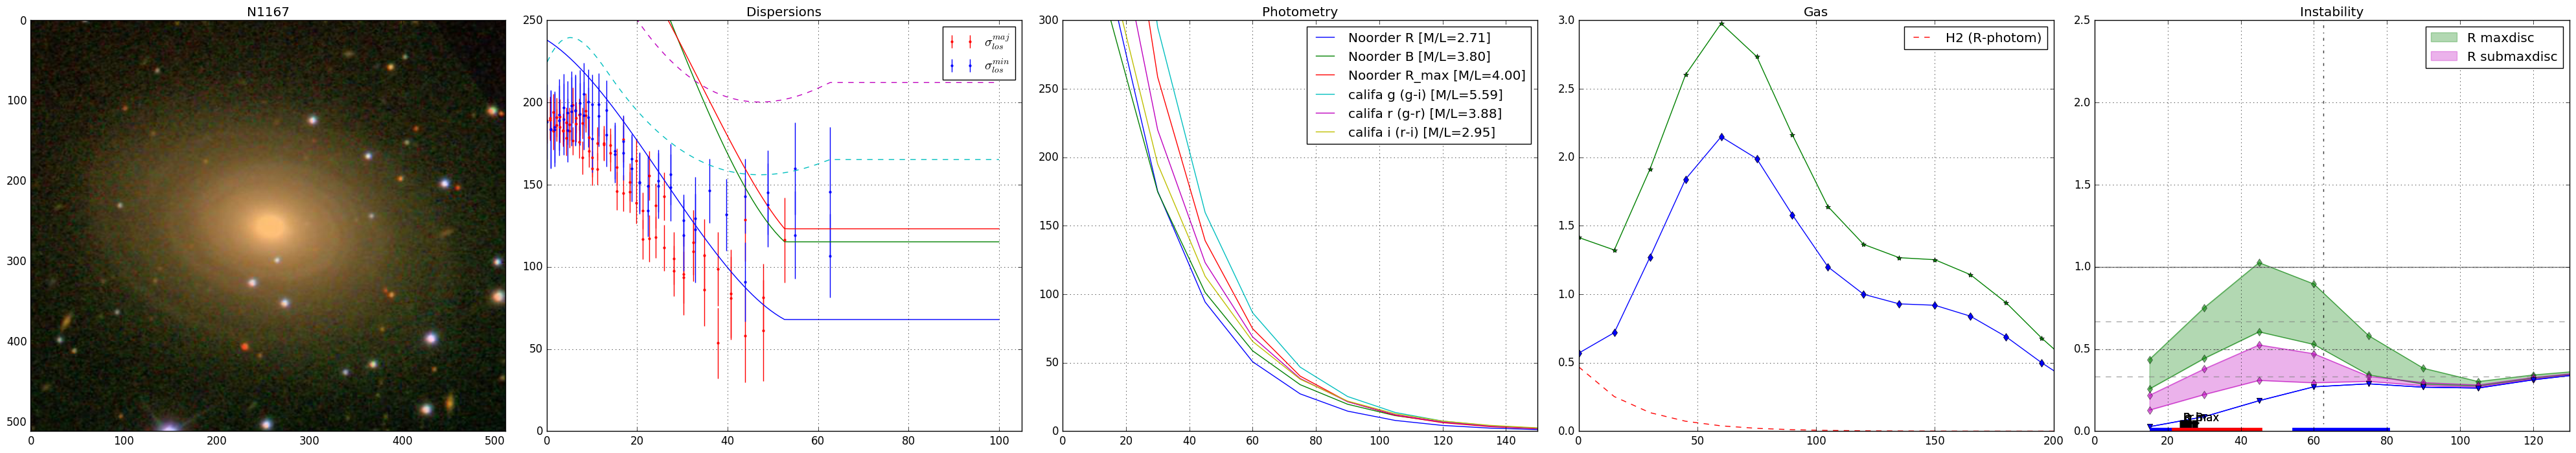

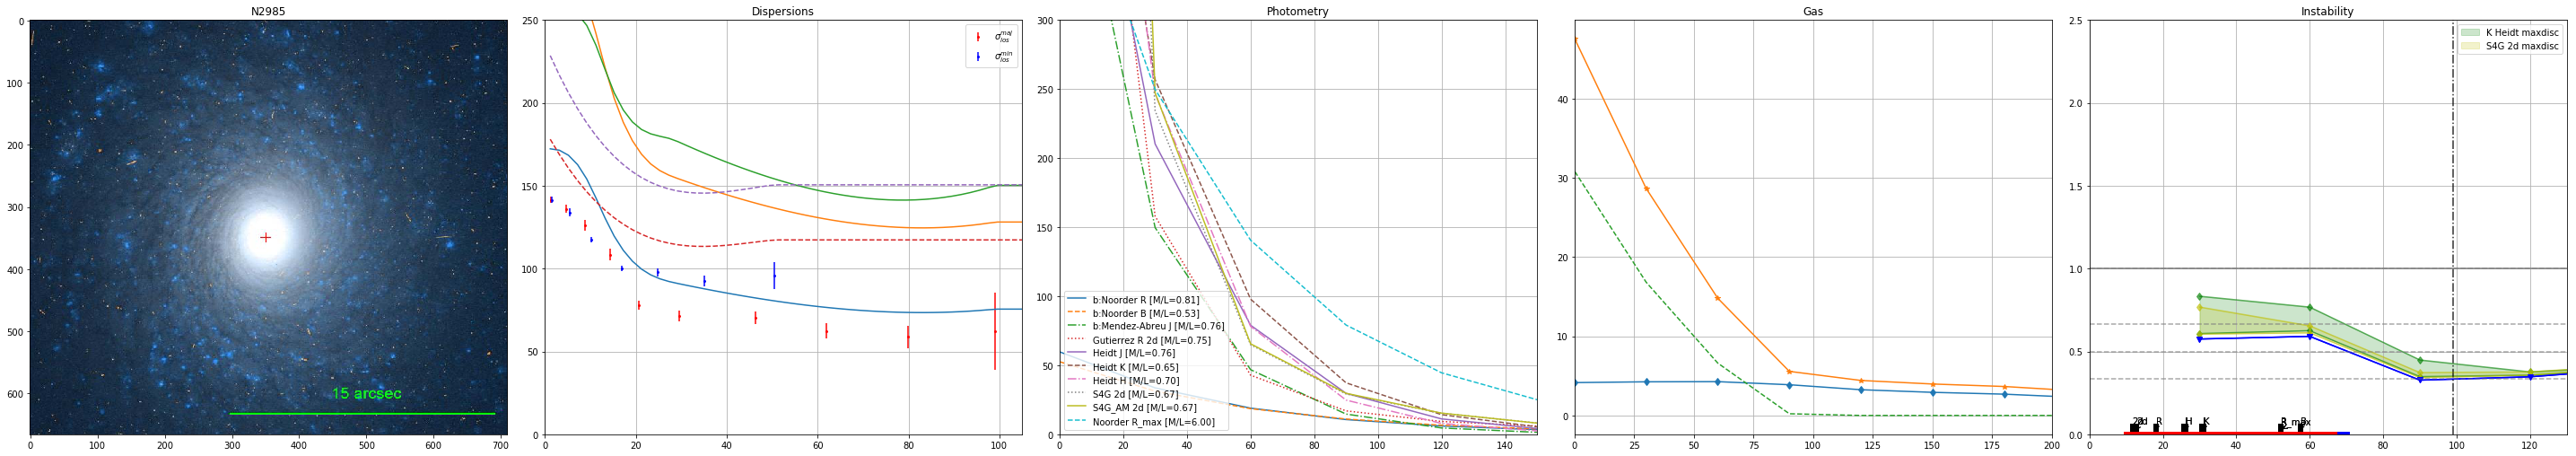

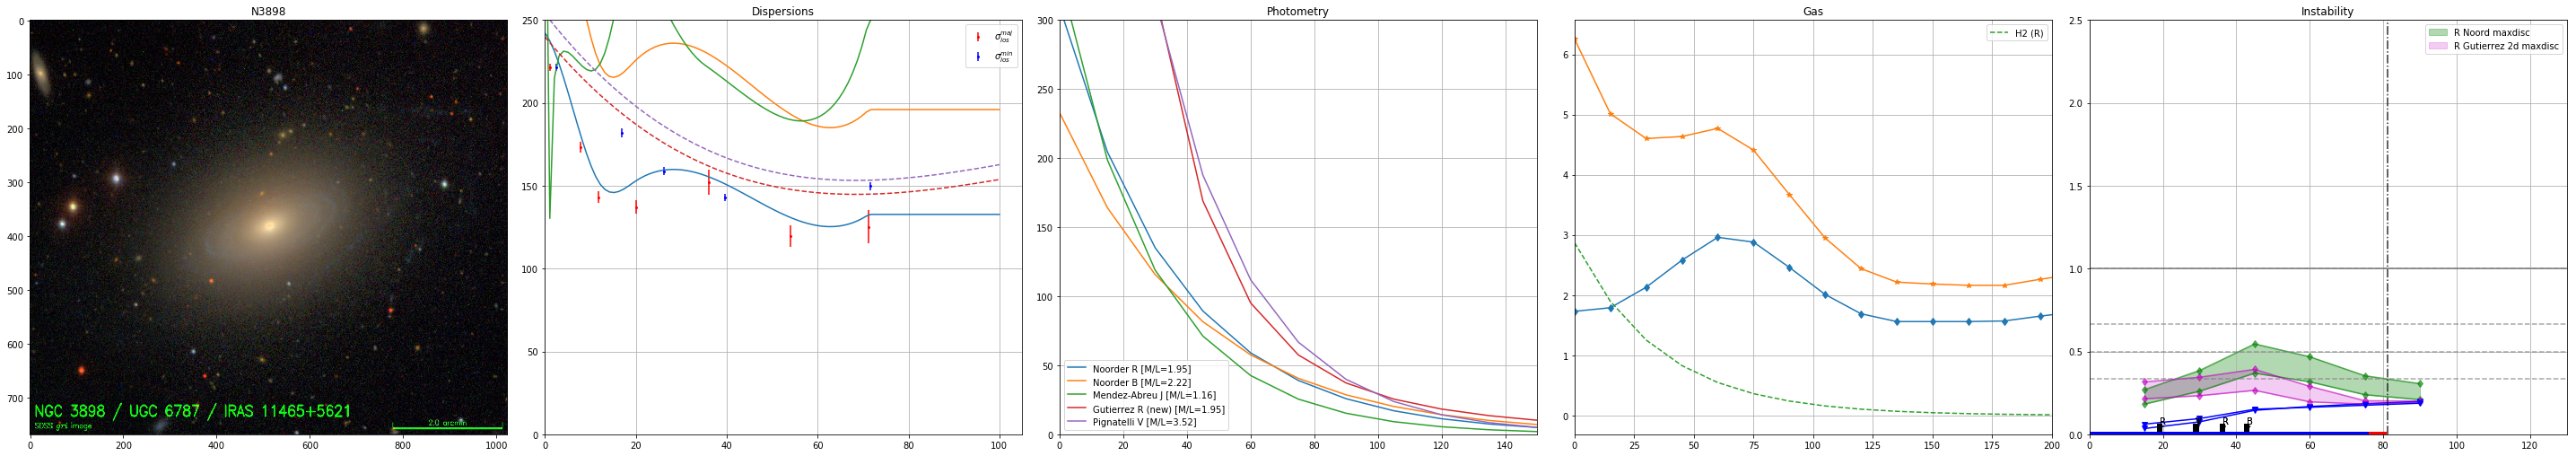

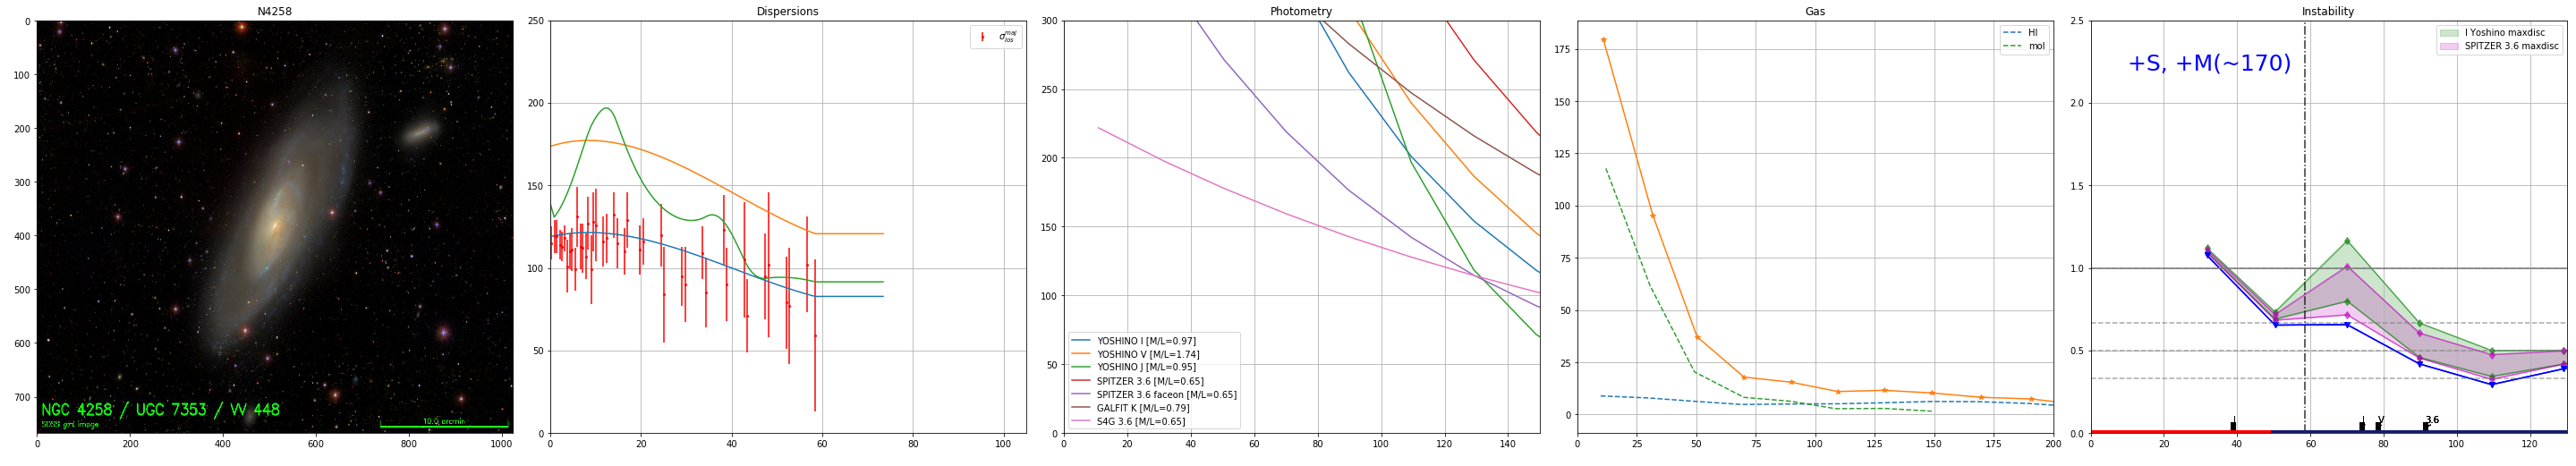

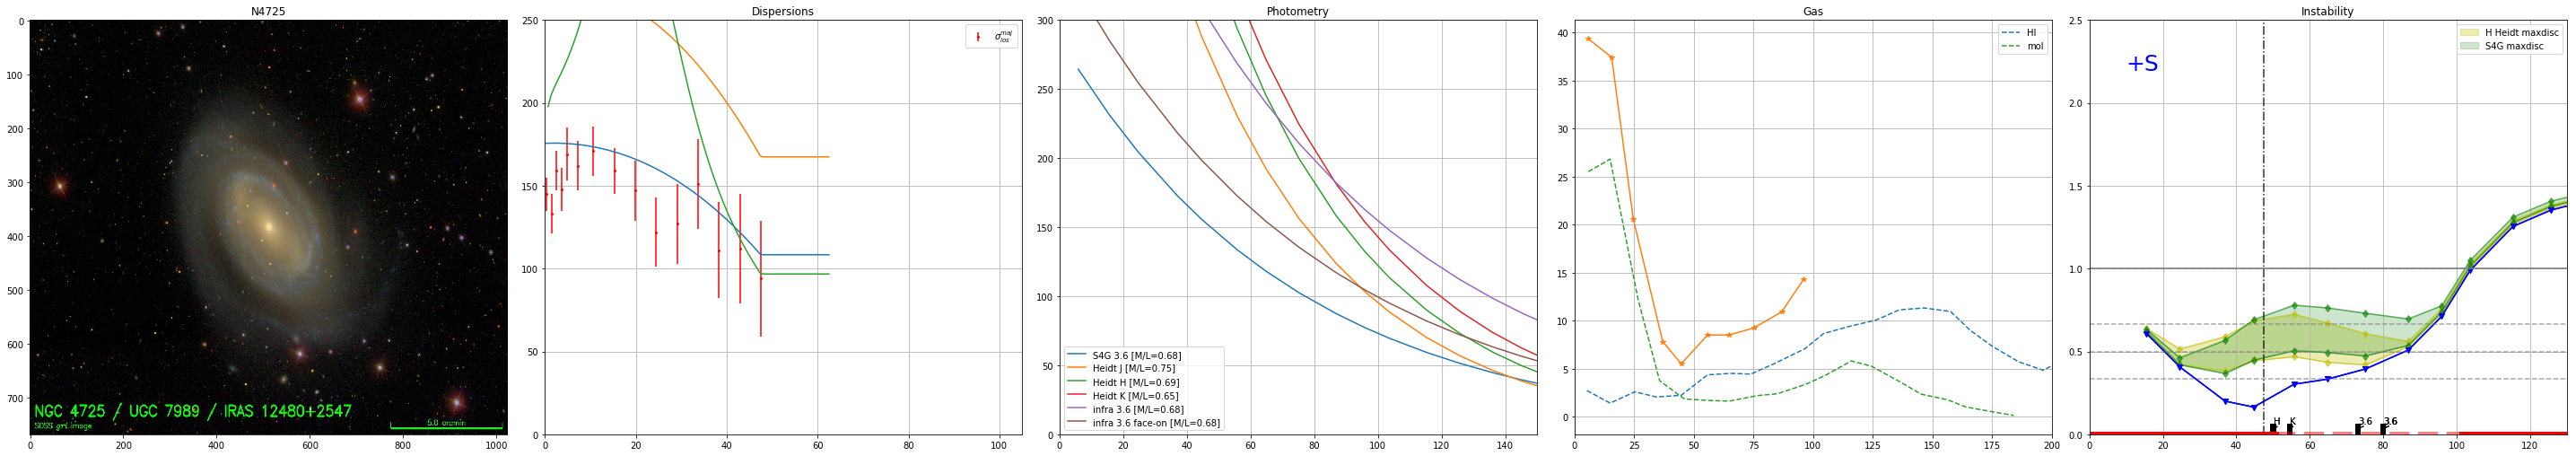

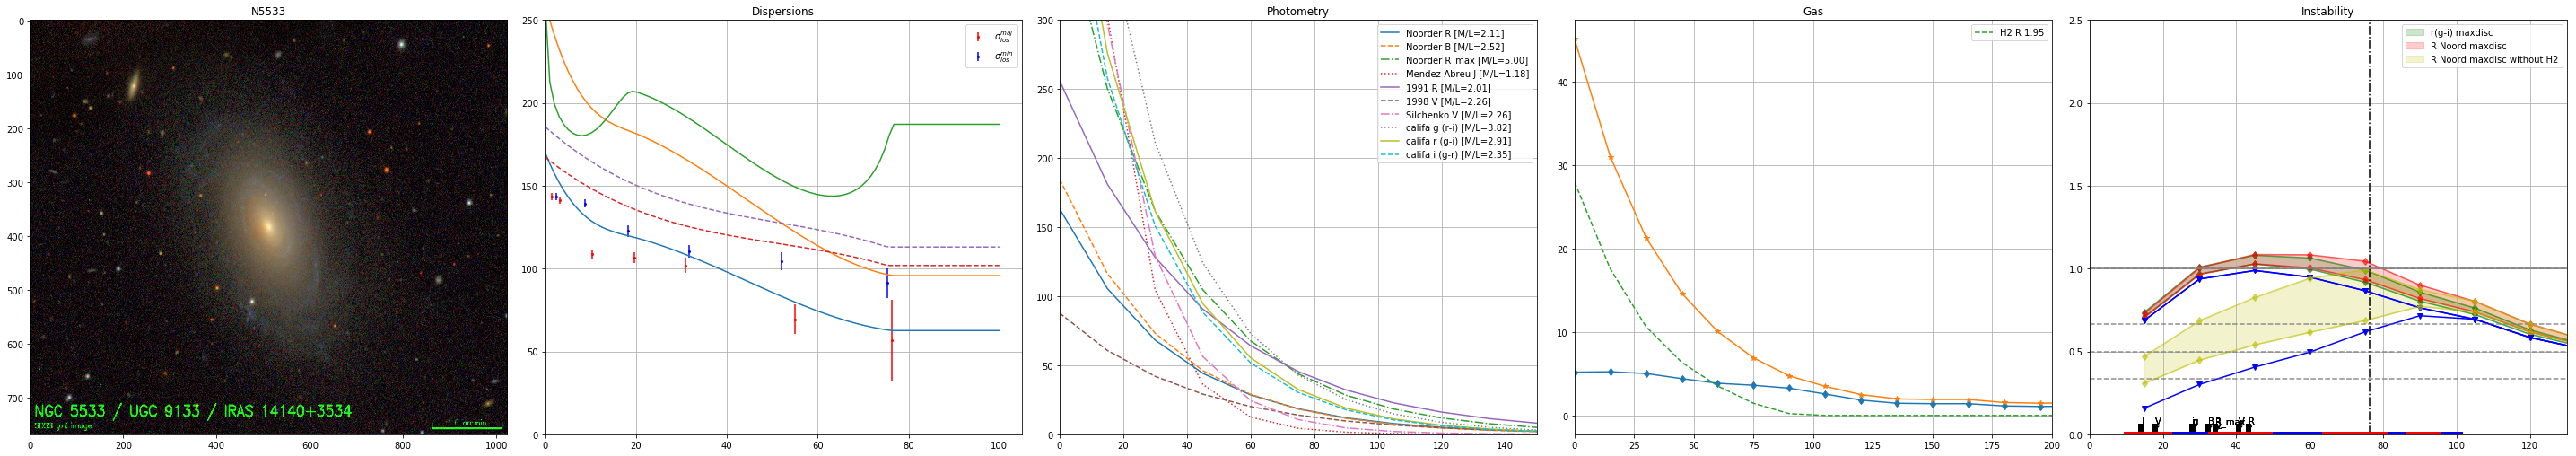

In [6]:
for img in os.listdir(summary_imgs_path):
    display(Image(summary_imgs_path + img))

Одна большая композитная картинка:

In [7]:
images = []
for img in os.listdir(summary_imgs_path):
    im = Im.open(summary_imgs_path + img)
    images.append(im)
    
widths, heights = zip(*(i.size for i in images))

total_height = sum(heights)
max_width = max(widths)

new_im = Im.new('RGB', (max_width, total_height))

offset = 0
for im in images:
    new_im.paste(im, (0,offset))
    offset += im.size[1]

new_im.save('summary_all.jpg')

In [8]:
# странное поведение - если тут поменять размер с 19 до 20, то картинку нельзя будет "открыть в новой вкладке", так что я просто ее сохранил 

# import matplotlib.pylab as plt

# fig = plt.figure(figsize=[19, 4*6])
# plt.imshow(new_im)
# plt.xticks([])
# plt.yticks([])
# plt.show()

Неустойчивость в далеких спиралях:

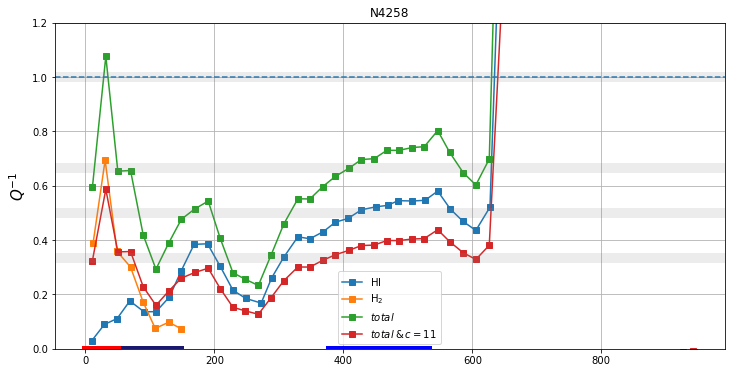

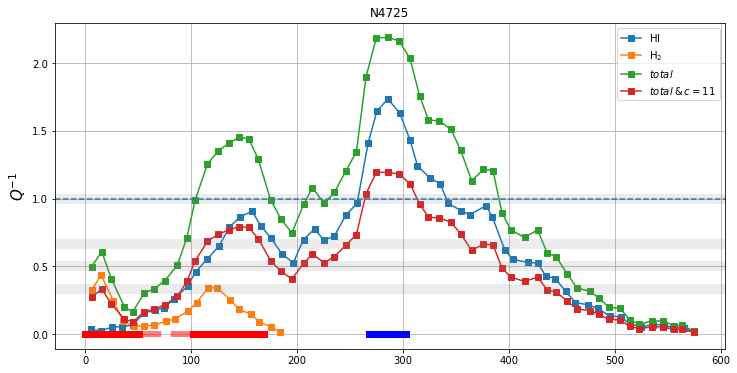

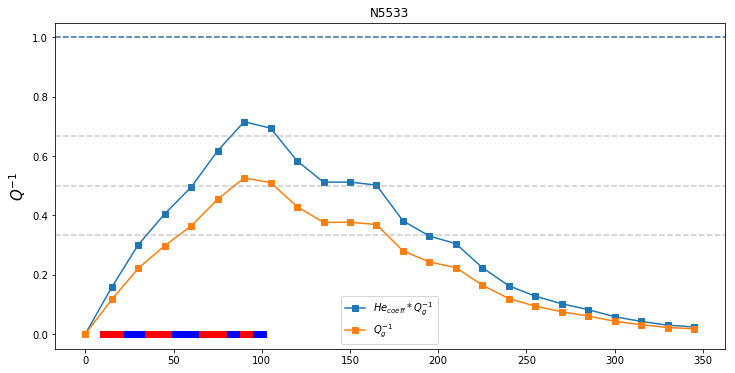

In [9]:
for img in os.listdir('..\\pics\\instab_spirals\\'):
    display(Image('..\\pics\\instab_spirals\\' + img))

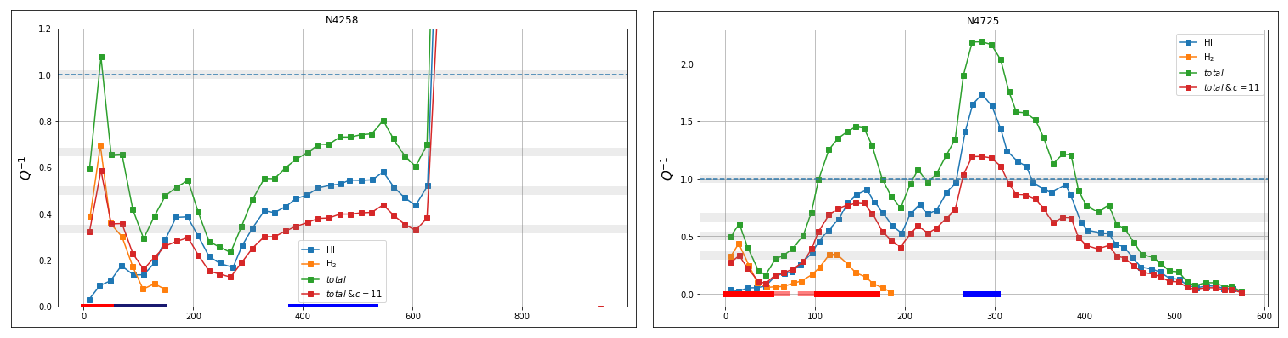

In [10]:
images = []
imnames = []
for img in os.listdir('..\\pics\\instab_spirals\\'):
    if '5533' not in img:
        im = Im.open('..\\pics\\instab_spirals\\' + img)
        images.append(im)
        imnames.append(img)

        
fig, axes = plt.subplots(1, 2, figsize=[18, 9])
for ind, im in enumerate(images):
    axes[ind].imshow(im)
    axes[ind].set_xticks([])
    axes[ind].set_yticks([])
plt.tight_layout()
plt.show()

## Romeo-Falstad 2013 сравнение 

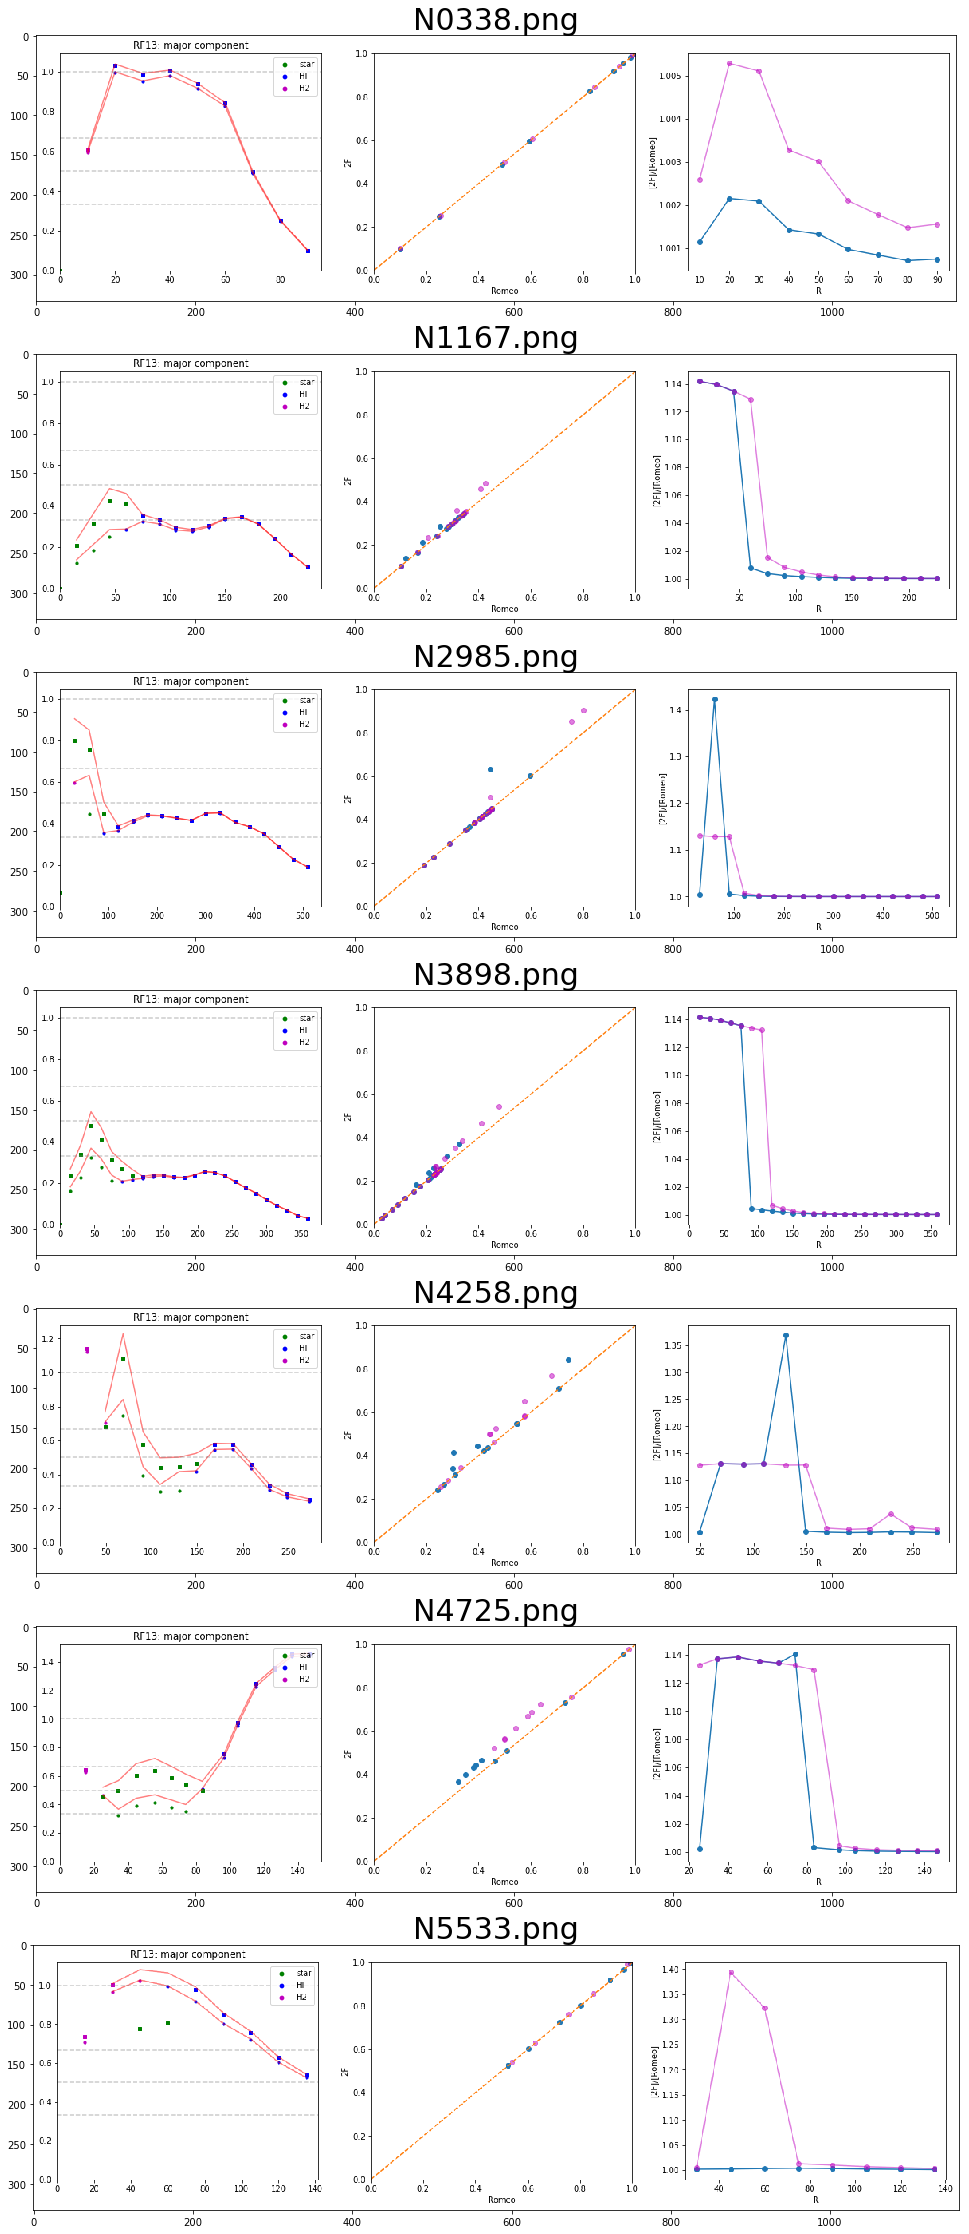

In [11]:
images = []
imnames = []
for img in os.listdir('..\\pics\\RF13\\'):
    im = Im.open('..\\pics\\RF13\\' + img)
    images.append(im)
    imnames.append(img)
    
fig, axes = plt.subplots(7, 1, figsize=[20, 40])
for ind, im in enumerate(images):
    axes[ind].imshow(im)
    axes[ind].set_title(imnames[ind], fontsize=30)
plt.show()

Видно, что ситуация для всех похожая более-менее и все выглядит неплохо.

## Таблица источников

Ссылка на таблицу на [docs.google](https://docs.google.com/spreadsheets/d/1thm7UT-0zQx-a6Lfe_4nQ8EL-N_F7Ttdhd87QgL2DQ8/edit#gid=0).

НЕ ПОСЛЕДНЯЯ ВЕРСИЯ

In [12]:
data_sources = pd.read_csv('sources_data.csv')

Без ссылок и замечаний (формат в ячейках - $i$, $D(Mpc)$, $PA$):

In [13]:
def highlights(s):
    return ['background-color: #D8D8D8' if i in [0, 1, 2, 3, 12, 18, 22,] else '' for i in range(len(s))]

s = data_sources[[c for c in data_sources.columns[:-2]]].style.apply(highlights)
s

Ссылки:

In [14]:
PrettyPandas(data_sources[[c for c in (data_sources.columns[0], data_sources.columns[-2])]])

## Ошибки

По колонкам - Влияние наклона, варьирования $c_g$ от 4 до 15 (20 бинов), убирание молек. газа.

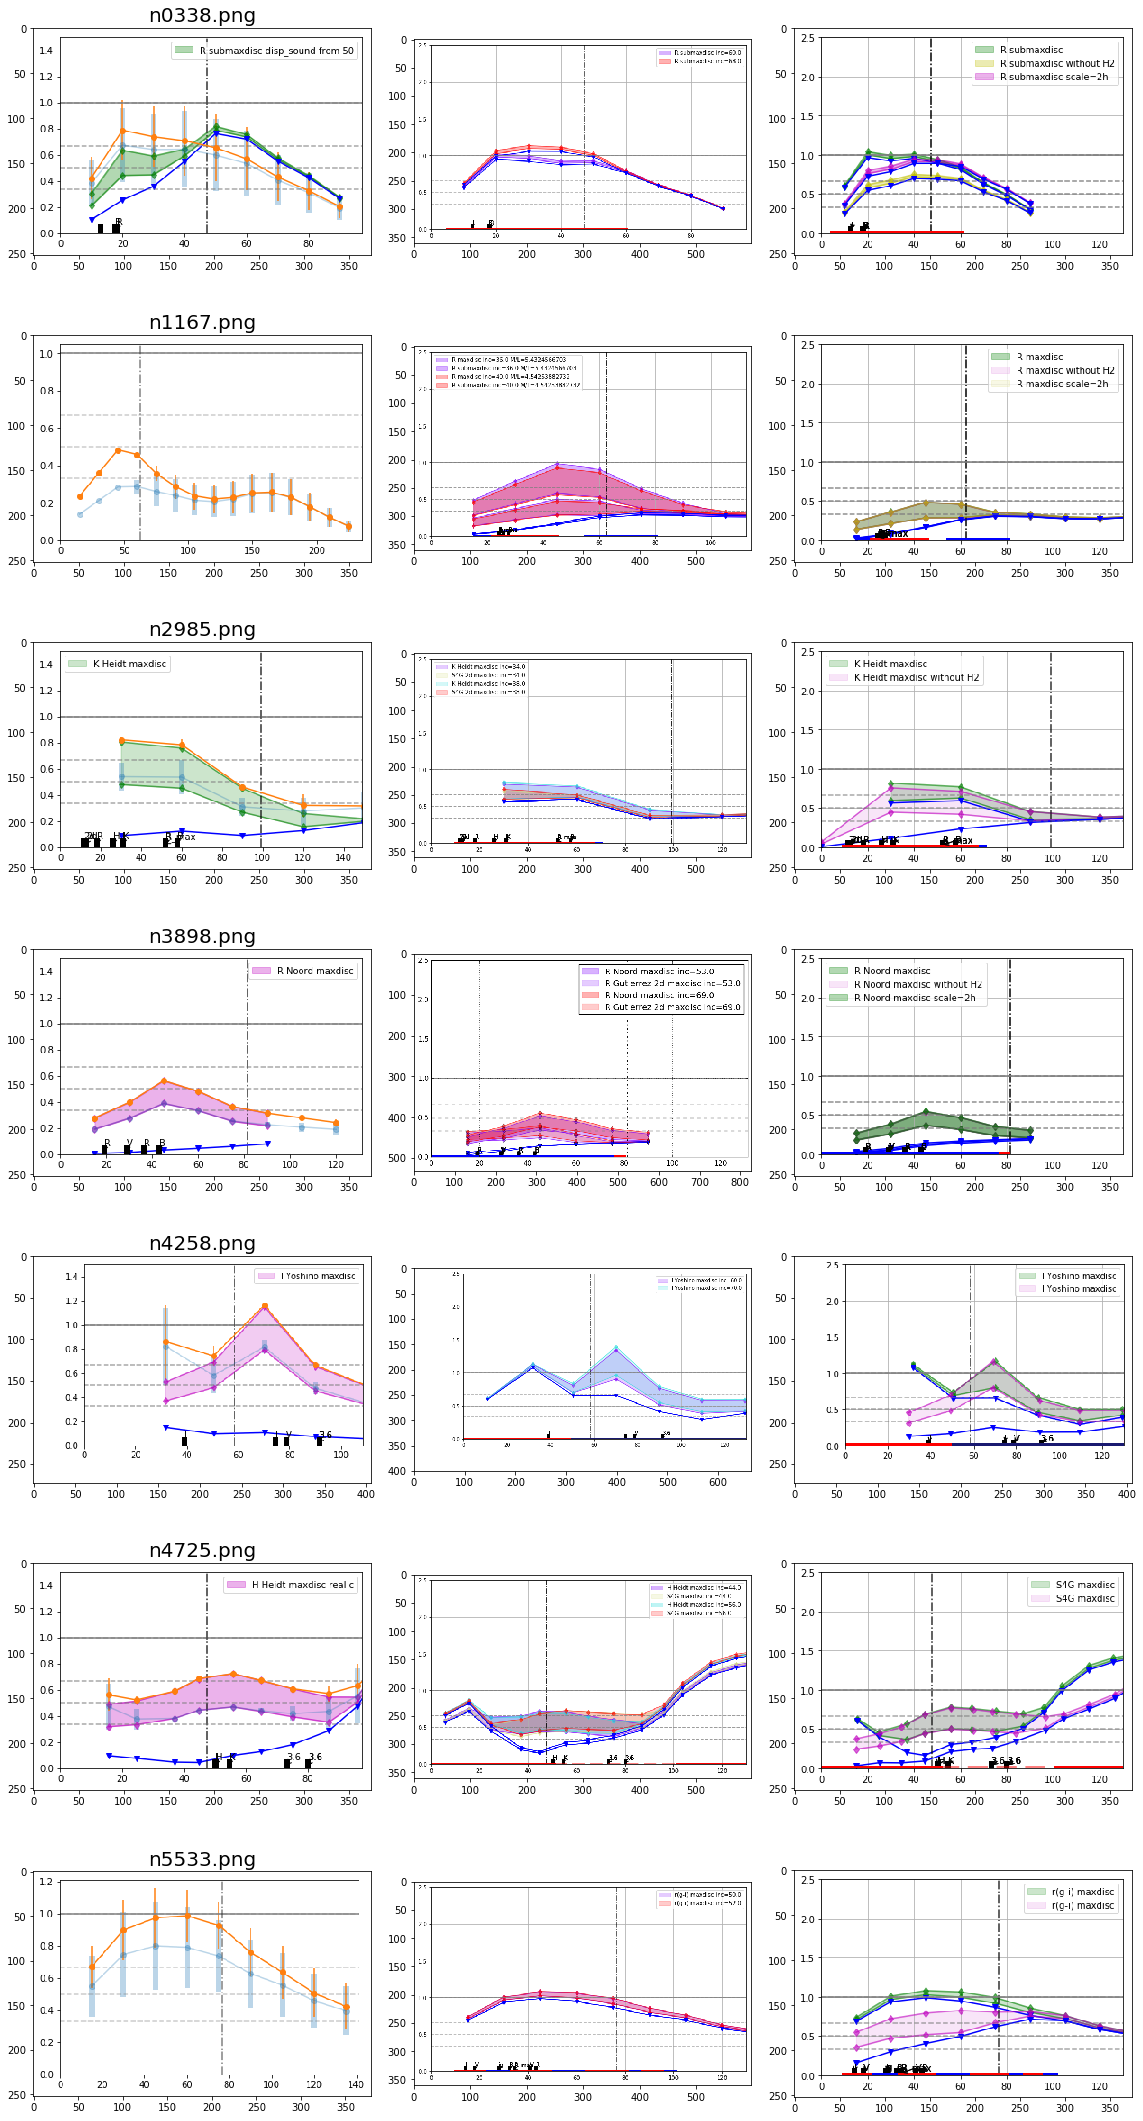

In [15]:
images = []
imnames = []
for img in os.listdir('..\\pics\\cg\\'):
    im = Im.open('..\\pics\\cg\\' + img)
    images.append(im)
    imnames.append(img)
    
fig, axes = plt.subplots(7, 3, figsize=[16, 30])
for ind, im in enumerate(images):
    axes[ind][0].imshow(im)
    axes[ind][0].set_title(imnames[ind], fontsize=20)

images = []
imnames = []
for img in os.listdir('..\\pics\\incl_summary\\'):
    im = Im.open('..\\pics\\incl_summary\\' + img)
    images.append(im)
    imnames.append(img)
    
for ind, im in enumerate(images):
    axes[ind][1].imshow(im)
    
images = []
imnames = []
for img in os.listdir('..\\pics\\He\\'):
    im = Im.open('..\\pics\\He\\' + img)
    images.append(im)
    imnames.append(img)
    
for ind, im in enumerate(images):
    axes[ind][2].imshow(im)
    

fig.tight_layout()
plt.show()